In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [181]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [182]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [183]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
data = np.array(data)
m, n = data.shape # row, column
np.random.shuffle(data)

# data for cross validation
data_dev = data[0:1000].T
Y_dev = data_dev[0] # digit labels (0, 1, 2, 3 ... 9)
X_dev = data_dev[1:n] 
X_dev = X_dev / 255.

# training data
data_train = data[1000:m].T
Y_train = data_train[0] # digit labels (0, 1, 2, 3 ... 9)
X_train = data_train[1:n]
_,m_train = X_train.shape

In [185]:
Y_train

array([2, 8, 7, ..., 3, 7, 3])

In [186]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01 # Initialize weights with a smaller scale
    b1 = np.zeros((10, 1)) # Initialize biases to zero
    W2 = np.random.randn(10, 10) * 0.01 # Similarly scale w2
    b2 = np.zeros((10, 1)) # Initialize biases to zero
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [187]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [188]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.001, 500)

Iteration:  0
[0 0 0 ... 0 0 0] [2 8 7 ... 3 7 3]
0.11170731707317073
Iteration:  10
[0 0 7 ... 7 7 0] [2 8 7 ... 3 7 3]
0.2348780487804878
Iteration:  20
[2 0 7 ... 3 7 0] [2 8 7 ... 3 7 3]
0.4677317073170732
Iteration:  30
[2 0 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.6350487804878049
Iteration:  40
[2 2 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.7122195121951219
Iteration:  50
[2 2 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.752780487804878
Iteration:  60
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.7791707317073171
Iteration:  70
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.7975853658536586
Iteration:  80
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.814
Iteration:  90
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.8270975609756097
Iteration:  100
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.8352926829268292
Iteration:  110
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.8110975609756098
Iteration:  120
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.8350975609756097
Iteration:  130
[2 8 7 ... 3 7 3] [2 8 7 ... 3 7 3]
0.8554146341463414
Iteration:  140
[2 8 7 ... 3 7

In [192]:
W1, b1, W2, b2

(array([[ 0.01532946,  0.0047854 ,  0.00292618, ..., -0.00490467,
          0.00784148,  0.01571471],
        [-0.02496272,  0.00275594,  0.00916027, ..., -0.01368021,
          0.00234157, -0.00168053],
        [-0.018499  ,  0.00968138,  0.0057445 , ..., -0.00800619,
         -0.00670116,  0.01841605],
        ...,
        [-0.00682044, -0.01019761, -0.01549672, ..., -0.00358585,
          0.00860164,  0.00556196],
        [-0.01154053, -0.02378927, -0.01419507, ..., -0.01429902,
         -0.00149396,  0.01263299],
        [ 0.01266537,  0.00708565,  0.00158872, ..., -0.00392199,
          0.01354236, -0.00140028]]),
 array([[0.00024421],
        [0.00024421],
        [0.00024421],
        [0.00024421],
        [0.00024421],
        [0.00024421],
        [0.00024421],
        [0.00024421],
        [0.00024421],
        [0.00024421]]),
 array([[-0.04350373, -0.0230556 ,  0.02009911,  0.01816376, -0.07740244,
          0.0375733 , -0.02628589, -0.02679665,  0.03991785,  0.00585628],
  

In [189]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


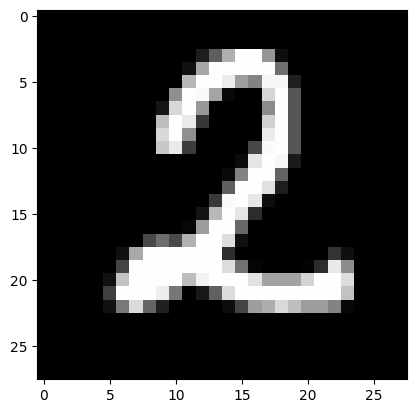

Prediction:  [8]
Label:  8


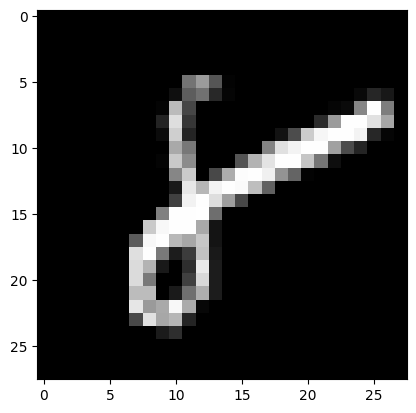

Prediction:  [7]
Label:  7


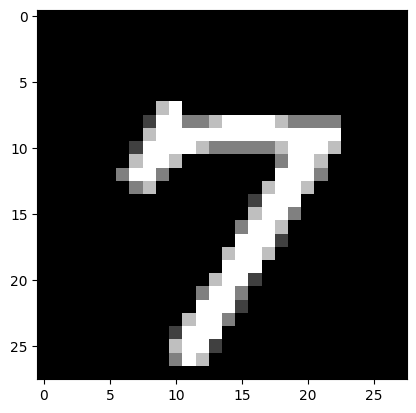

Prediction:  [7]
Label:  7


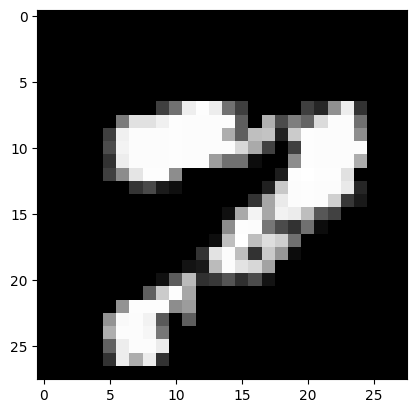

In [190]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)